In [104]:
import pandas as pd
import numpy as np

In [105]:
# load data from csv 

df_raw = pd.read_csv('data/elysee.csv', sep=';')
df_raw.head()

,Identifiant arc,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape
0,4264,AV_Champs_Elysees,2023-02-01T23:00:00+01:00,764.0,11.28000,Fluide,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
1,4264,AV_Champs_Elysees,2023-02-01T22:00:00+01:00,819.0,16.52056,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
2,4264,AV_Champs_Elysees,2023-02-01T20:00:00+01:00,1082.0,19.98722,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
3,4264,AV_Champs_Elysees,2023-02-01T18:00:00+01:00,1027.0,23.27334,Pré-saturé,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.87153587897717, 2.3017227924560615","{""coordinates"": [[2.3009951475338766, 48.87177..."
4,4264,AV_Champs_Elysees,2022-12-07T00:00:00+01:00,528.0,68.14334,Bloqué,2294,Av_Champs_Elysees-Washington,2293,Av_Champs_Elysees-Berri,Invalide,2005-01-01,2019-06-01,"48.871535879911605, 2.3017227924560624","{""coordinates"": [[2.300995147533877, 48.871777..."


<Axes: xlabel='Date et heure de comptage'>

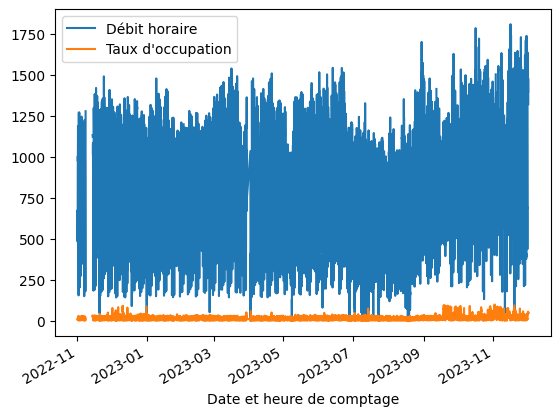

In [106]:
df_raw["Date et heure de comptage"] = pd.to_datetime(df_raw["Date et heure de comptage"], utc=True)
df_raw[["Date et heure de comptage", "Débit horaire", "Taux d'occupation"]].set_index("Date et heure de comptage").plot()

In [107]:
# feaurture engineering
df = df_raw[['Date et heure de comptage', 'Débit horaire', 'Taux d\'occupation']].copy()
df["hour"] = df["Date et heure de comptage"].dt.hour
df["weekday"] = df["Date et heure de comptage"].dt.weekday
df["month"] = df["Date et heure de comptage"].dt.month
df = df.sort_values(by="Date et heure de comptage")
df["Taux d\'occupation_T-1"] = df["Taux d\'occupation"].shift(1)
df["Débit horaire_T-1"] = df["Débit horaire"].shift(1)
df["hour_T-1"] = df["hour"].shift(1)
df["weekday_T-1"] = df["weekday"].shift(1)
df["month_T-1"] = df["month"].shift(1)
df = df.dropna()
df

,Date et heure de comptage,Débit horaire,Taux d'occupation,hour,weekday,month,Taux d'occupation_T-1,Débit horaire_T-1,hour_T-1,weekday_T-1,month_T-1
2419,2022-11-01 04:00:00+00:00,513.0,7.12889,4,1,11,8.89223,672.0,3.0,1.0,11.0
2418,2022-11-01 05:00:00+00:00,494.0,6.22500,5,1,11,7.12889,513.0,4.0,1.0,11.0
2887,2022-11-01 06:00:00+00:00,513.0,5.80723,6,1,11,6.22500,494.0,5.0,1.0,11.0
2417,2022-11-01 07:00:00+00:00,484.0,5.57111,7,1,11,5.80723,513.0,6.0,1.0,11.0
2886,2022-11-01 08:00:00+00:00,524.0,6.20055,8,1,11,5.57111,484.0,7.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...
144,2023-12-01 19:00:00+00:00,1430.0,53.45889,19,4,12,55.69222,1392.0,18.0,4.0,12.0
142,2023-12-01 20:00:00+00:00,1480.0,43.57389,20,4,12,53.45889,1430.0,19.0,4.0,12.0
141,2023-12-01 21:00:00+00:00,1421.0,53.80111,21,4,12,43.57389,1480.0,20.0,4.0,12.0
140,2023-12-01 22:00:00+00:00,1410.0,51.92889,22,4,12,53.80111,1421.0,21.0,4.0,12.0


In [108]:
# data set split
X = df[["Débit horaire_T-1", "Taux d\'occupation_T-1", "hour_T-1", "weekday_T-1", "month_T-1"]]
Y = df[["Débit horaire", "Taux d\'occupation"]]

In [109]:
X

,Débit horaire_T-1,Taux d'occupation_T-1,hour_T-1,weekday_T-1,month_T-1
2419,672.0,8.89223,3.0,1.0,11.0
2418,513.0,7.12889,4.0,1.0,11.0
2887,494.0,6.22500,5.0,1.0,11.0
2417,513.0,5.80723,6.0,1.0,11.0
2886,484.0,5.57111,7.0,1.0,11.0
...,...,...,...,...,...
144,1392.0,55.69222,18.0,4.0,12.0
142,1430.0,53.45889,19.0,4.0,12.0
141,1480.0,43.57389,20.0,4.0,12.0
140,1421.0,53.80111,21.0,4.0,12.0


In [110]:
Y

,Débit horaire,Taux d'occupation
2419,513.0,7.12889
2418,494.0,6.22500
2887,513.0,5.80723
2417,484.0,5.57111
2886,524.0,6.20055
...,...,...
144,1430.0,53.45889
142,1480.0,43.57389
141,1421.0,53.80111
140,1410.0,51.92889


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# perform scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# use knn to predict 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("RMSE 5-NN: ", mean_squared_error(y_test, y_pred, squared=False))

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("RMSE Linear regression: ", mean_squared_error(y_test, y_pred, squared=False))

# use random forest to predict

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("RMSE Random Forest: ", mean_squared_error(y_test, y_pred, squared=False))

# use xgboost to predict

import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("RMSE XGBoost: ", mean_squared_error(y_test, y_pred, squared=False))



RMSE 5-NN:  108.35040244238093
RMSE Linear regression:  91.396560918441
RMSE Random Forest:  87.79390479380532
RMSE XGBoost:  88.08158774894811


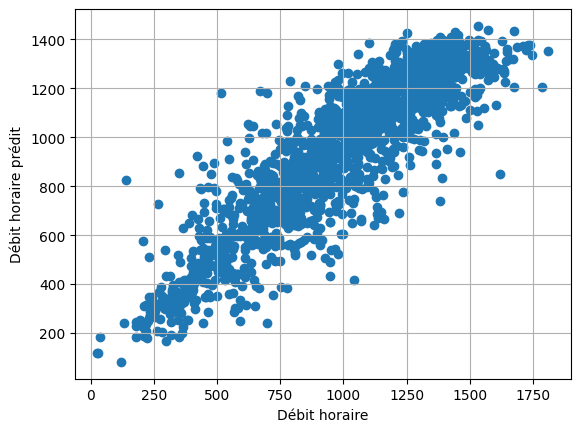

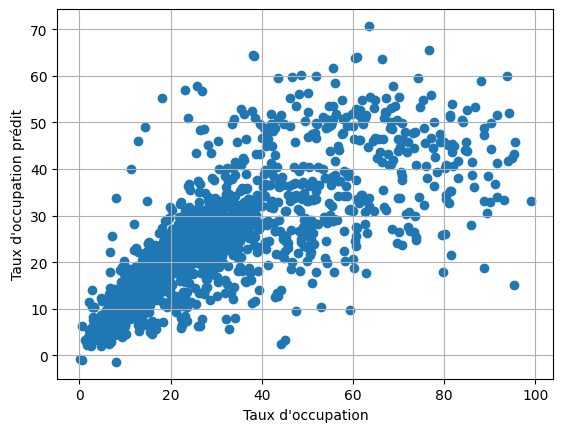

In [112]:
import matplotlib.pyplot as plt
plt.scatter(y_test["Débit horaire"], y_pred[:, 0])
plt.xlabel("Débit horaire")
plt.ylabel("Débit horaire prédit")
plt.grid()
plt.show()

plt.scatter(y_test["Taux d\'occupation"], y_pred[:, 1])
plt.xlabel("Taux d'occupation")
plt.ylabel("Taux d'occupation prédit")
plt.grid()
plt.show()